<a href="https://colab.research.google.com/github/tejasmaskar09/bml-exp/blob/main/kmeans_clustering_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

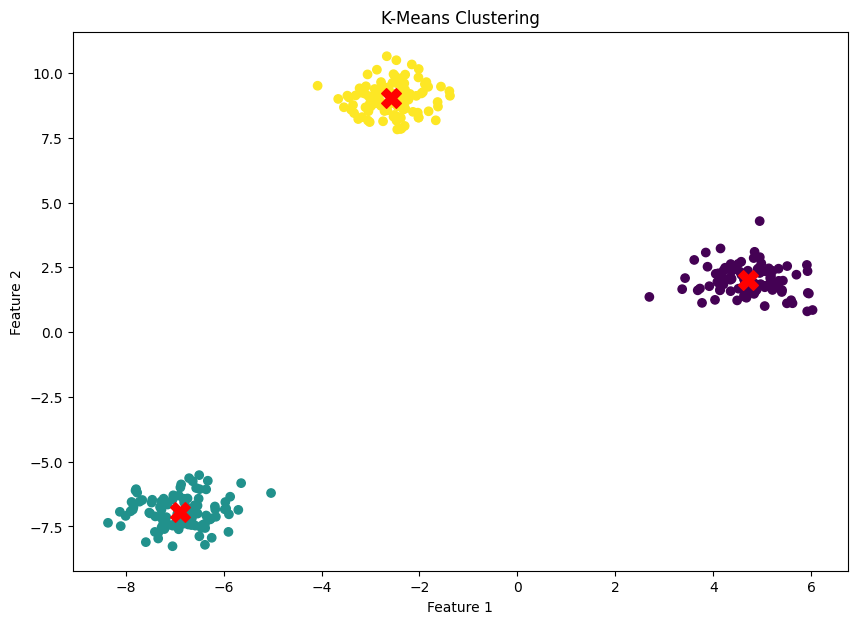

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def kmeans(X, k=3, max_iters=100, tol=1e-4):
    """
    K-means clustering algorithm

    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Training data
    k : int, default=3
        Number of clusters
    max_iters : int, default=100
        Maximum number of iterations
    tol : float, default=1e-4
        Tolerance for convergence

    Returns:
    --------
    centroids : array, shape (k, n_features)
        Coordinates of cluster centers
    labels : array, shape (n_samples,)
        Labels of each point
    """
    X = np.array(X)

    # Randomly initialize centroids
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    for _ in range(max_iters):
        # Assign clusters
        labels = assign_clusters(X, centroids)

        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, labels

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Apply K-means
centroids, labels = kmeans(X, k=3)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()